# Stock prices

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import requests

In [ ]:
def fix_datetime_on_dataframe(df):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(keys='date', inplace=True)

In [ ]:
def create_stock_df_of_company(company_code):
    url = f'https://iex.lewagon.com/stable/stock/{company_code}/chart/3m'
    df = pd.read_json(url)
    fix_datetime_on_dataframe(df)
    df['company_code'] = company_code
    return df

In [ ]:
apple_df = create_stock_df_of_company('aapl')
apple_df.head()

,close,high,low,open,symbol,volume,id,key,subkey,updated,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,company_code
date,,,,,,,,,,,,,,,,,,,,,
2020-10-12,124.40,125.180,119.2845,120.06,AAPL,240226769,HISTORICAL_PRICES,AAPL,,1606830572000,...,240226769,119.8532,124.1858,124.9644,119.0791,240226769,"Oct 12, 20",0.00,0.0000,aapl
2020-10-13,121.10,125.390,119.6500,125.27,AAPL,262330451,HISTORICAL_PRICES,AAPL,,1606830572000,...,262330451,125.0543,120.8914,125.1740,119.4439,262330451,"Oct 13, 20",-3.30,-0.0265,aapl
2020-10-14,121.19,123.030,119.6200,121.00,AAPL,151062308,HISTORICAL_PRICES,AAPL,,1606830572000,...,151062308,120.7916,120.9813,122.8181,119.4140,151062308,"Oct 14, 20",0.09,0.0007,aapl
2020-10-15,120.71,121.200,118.1500,118.72,AAPL,112559219,HISTORICAL_PRICES,AAPL,,1606830572000,...,112559219,118.5155,120.5021,120.9913,117.9465,112559219,"Oct 15, 20",-0.48,-0.0040,aapl
2020-10-16,119.02,121.548,118.8100,121.28,AAPL,115393808,HISTORICAL_PRICES,AAPL,,1606830572000,...,115393808,121.0711,118.8150,121.3387,118.6054,115393808,"Oct 16, 20",-1.69,-0.0140,aapl


<AxesSubplot:xlabel='date'>

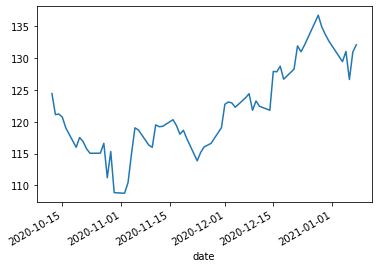

In [ ]:
apple_df['close'].plot(kind='line')

<AxesSubplot:xlabel='date'>

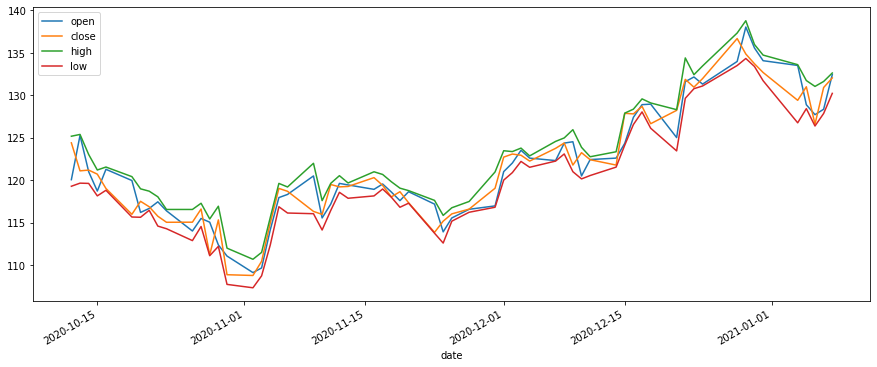

In [ ]:
apple_df[['open', 'close', 'high', 'low']].plot(kind='line', figsize=(15,6))

In [ ]:
apple_df.columns

Index(['close', 'high', 'low', 'open', 'symbol', 'volume', 'id', 'key',
       'subkey', 'updated', 'changeOverTime', 'marketChangeOverTime', 'uOpen',
       'uClose', 'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose', 'fHigh',
       'fLow', 'fVolume', 'label', 'change', 'changePercent', 'company_code'],
      dtype='object')

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.1, py-1.10.0, pluggy-0.13.1 -- /Users/krokrob/.pyenv/versions/3.8.6/envs/lewagon386/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/krokrob/code/lewagon/data-solutions/02-Data-Toolkit/02-Data-Sourcing/01-Stock-Market-API
plugins: anyio-2.0.2
collecting ... collected 3 items

tests/test_apple.py::TestApple::test_apple_df_columns PASSED             [ 33%]
tests/test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED  [ 66%]
tests/test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED  [100%]

============================== 3 passed in 0.28s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master


In [ ]:
# Set default figsize for all notebook (usefull in TS analysis)
matplotlib.rcParams['figure.figsize'] = (15, 6)

- Amazon stock prices: https://cloud.iexapis.com/stable/stock/amzn/chart/ytd?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad
- Facebook market cap: https://cloud.iexapis.com/stable/stock/fb/stats/marketcap?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad
- Apple research and development spendings quarterly: https://cloud.iexapis.com/stable/stock/aapl/financials?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad
- The last news about Tesla: https://cloud.iexapis.com/stable/stock/tsla/news/last/1?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad
- The performance of the ‘Energy’ sector: https://cloud.iexapis.com/stable/stock/market/sector-performance?token=pk_bb6b159d9ccd4ac2bedb4a98aaef5bad

In [ ]:
codes = ['amzn', 'googl', 'fb']
stock_dfs = [apple_df]
for code in codes:
    stock_dfs.append(create_stock_df_of_company(code))

In [ ]:
stocks_df = pd.concat(stock_dfs)
stocks_df.head()
# stocks_df_ = stocks_df.loc[:,['uClose','company_code']]
# stocks_df_

,open,close,high,low,volume,uOpen,uClose,uHigh,uLow,uVolume,change,changePercent,label,changeOverTime,company_code
date,,,,,,,,,,,,,,,
2020-07-10,95.34,95.92,95.98,94.71,90257320,381.34,383.68,383.92,378.82,22564330,0.00,0.0000,"Jul 10, 20",0.000000,aapl
2020-07-13,97.27,95.48,99.96,95.26,191649140,389.06,381.91,399.82,381.03,47912285,-0.44,-0.4613,"Jul 13, 20",-0.004613,aapl
2020-07-14,94.84,97.06,97.26,93.88,170989364,379.36,388.23,389.02,375.51,42747341,1.58,1.6548,"Jul 14, 20",0.011859,aapl
2020-07-15,98.99,97.73,99.25,96.49,153197932,395.96,390.90,396.99,385.96,38299483,0.67,0.6877,"Jul 15, 20",0.018818,aapl
2020-07-16,96.56,96.52,97.41,95.91,110577672,386.25,386.09,389.62,383.62,27644418,-1.20,-1.2305,"Jul 16, 20",0.006281,aapl


<AxesSubplot:xlabel='date'>

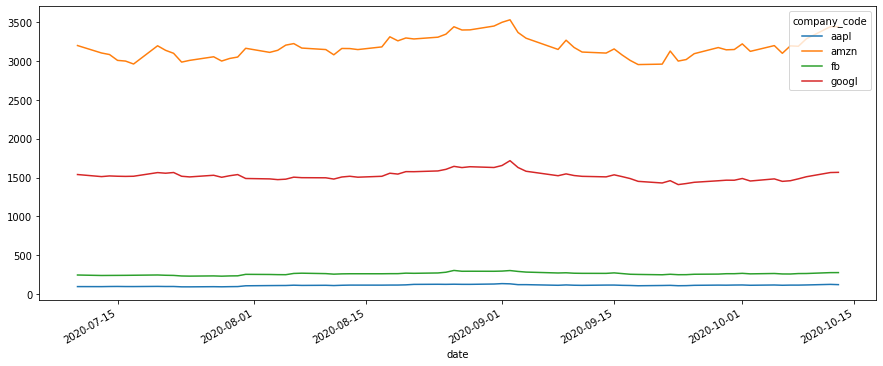

In [ ]:
# Pivot the table to get company_code as columns
pivot_df = stocks_df.pivot(columns='company_code', values='close')
pivot_df.plot(kind='line')

In [ ]:
def normalize(series):
    return series/series[0]

normalized_pivot = pivot_df.apply(normalize, axis=0)

<AxesSubplot:xlabel='date'>

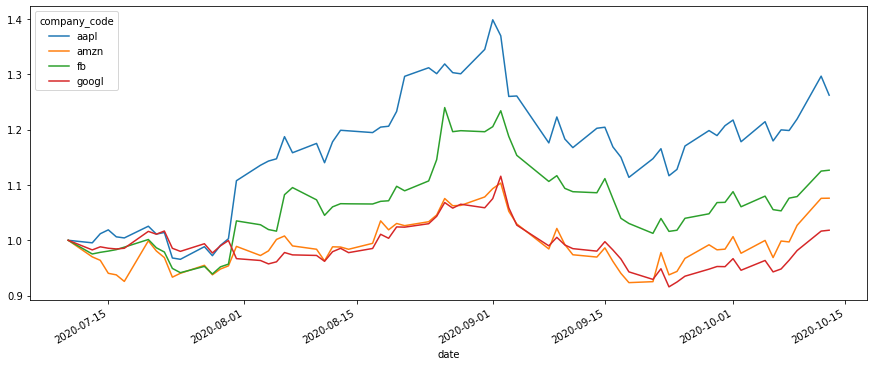

In [ ]:
normalized_pivot.plot(kind='line')